## Show Environment Use

Render a sample run through the of environment with random actions. 

In [1]:
from AppalachianRL.envs.trail import AppalachianTrailEnv

env = AppalachianTrailEnv()

obs, info = env.reset()
done = False

while not done:
    action = env.action_space.sample()
    obs, reward, done, trunc, info = env.step(action)
    env.render()

   INVALID ACTION: No resupply point nearby (32.0 miles away).
Day 1: 2200.0 miles left | Energy 100.0 | Food 10.0 | Weather 0
Day 2: 2179.0 miles left | Energy 79.0 | Food 8.9 | Weather 0
Day 3: 2171.0 miles left | Energy 73.8 | Food 8.1 | Weather 2
Day 4: 2171.0 miles left | Energy 100.0 | Food 7.6 | Weather 1
   STOPPED: You stopped at a resupply point
Day 5: 2168.0 miles left | Energy 79.1 | Food 6.5 | Weather 1
Day 6: 2149.0 miles left | Energy 58.2 | Food 5.4 | Weather 1
   RESUPPLY: You resupplied at 51.0 miles.
Day 7: 2147.0 miles left | Energy 100.0 | Food 10.0 | Weather 0
   STOPPED: You stopped at a resupply point
Day 8: 2130.0 miles left | Energy 71.4 | Food 8.9 | Weather 2
Day 9: 2114.0 miles left | Energy 59.4 | Food 7.9 | Weather 0
   INVALID ACTION: No resupply point nearby (24.0 miles away).
Day 10: 2114.0 miles left | Energy 59.4 | Food 7.9 | Weather 2
Day 11: 2114.0 miles left | Energy 100.0 | Food 7.4 | Weather 2
Day 12: 2114.0 miles left | Energy 100.0 | Food 6.9 |

## Test Solvers

Run episodes on solvers to test how well they stack up. Include random actions for comparison.


Training Random...
   REST: You rested at 0.0 miles.
   STOPPED: You stopped at a resupply point
   REST: You rested at 32.0 miles.
   STOPPED: You stopped at a resupply point
   STOPPED: You stopped at a resupply point
   REST: You rested at 70.0 miles.
   REST: You rested at 93.0 miles.
   INVALID ACTION: No resupply point nearby (17.0 miles away).
   STOPPED: You stopped at a resupply point
   REST: You rested at 110.0 miles.
   INVALID ACTION: No resupply point nearby (27.0 miles away).
   INVALID ACTION: No resupply point nearby (27.0 miles away).
   REST: You rested at 110.0 miles.
   STOPPED: You stopped at a resupply point
   INVALID ACTION: No resupply point nearby (28.0 miles away).
   STOPPED: You stopped at a resupply point
   INVALID ACTION: No resupply point nearby (42.0 miles away).
   INVALID ACTION: No resupply point nearby (31.0 miles away).
   REST: You rested at 176.0 miles.
   INVALID ACTION: No resupply point nearby (31.0 miles away).
   STOPPED: You stopped at a

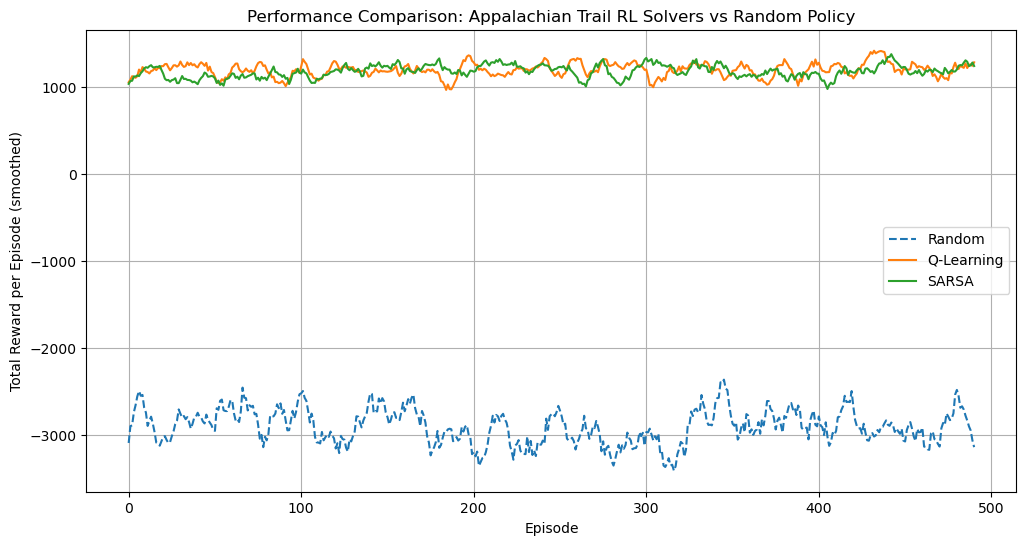

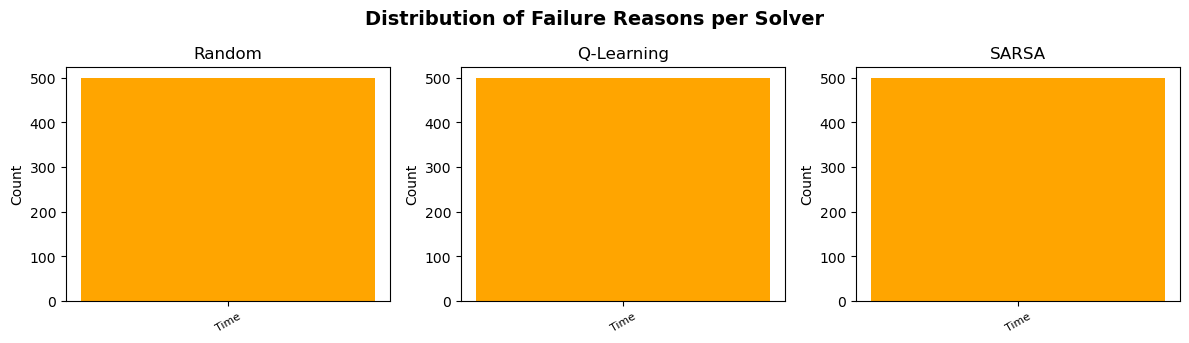

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

from AppalachianRL.envs.trail import AppalachianTrailEnv
from AppalachianRL.solvers.q_learning import QLearningSolver
from AppalachianRL.solvers.sarsa import SarsaSolver
from AppalachianRL.solvers.policy_gradient import PolicyGradientSolver
from AppalachianRL.solvers.random import RandomAgent
from AppalachianRL.solvers.actor_critic import ActorCriticSolver

# ---------------------------
# Experiment Parameters
# ---------------------------
EPISODES = 500    # number of training episodes for each solver
SEED = 2025

# ---------------------------
# Initialize environment
# ---------------------------
env = AppalachianTrailEnv(seed=SEED)

# ---------------------------
# Initialize solvers
# ---------------------------
solvers = {
    "Random": RandomAgent(env, seed=SEED),
    "Q-Learning": QLearningSolver(env, seed=SEED),
    "SARSA": SarsaSolver(env, seed=SEED),
    # "Policy Gradient": PolicyGradientSolver(env, seed=SEED),
    # "Actor-Critic": ActorCriticSolver(env, seed=SEED),
}

# ---------------------------
# Train each solver and collect rewards
# ---------------------------
all_rewards = {}
all_failures = {}


for name, solver in solvers.items():
    print(f"\nTraining {name}...")
    rewards, failures = solver.train(episodes=EPISODES)
    all_rewards[name] = rewards
    all_failures[name] = failures
  

# ---------------------------
# Plot results
# ---------------------------

# Reward training curve
plt.figure(figsize=(12, 6))
for name, rewards in all_rewards.items():
    smoothed = np.convolve(rewards, np.ones(10)/10, mode='valid')
    # dashed line for Random, solid for others
    linestyle = '--' if name=='Random' else None
    plt.plot(smoothed, label=name, linestyle=linestyle) 

plt.title("Performance Comparison: Appalachian Trail RL Solvers vs Random Policy")
plt.xlabel("Episode")
plt.ylabel("Total Reward per Episode (smoothed)")
plt.legend()
plt.grid(True)
plt.show()

# failures distributions
colors = {
    "Success": "green",
    "Food": "blue",
    "Energy": "red",
    "Time": "orange",
    "Skipped Resupply": "purple"
}
plt.figure(figsize=(12, 6))
plt.suptitle("Distribution of Failure Reasons per Solver", fontsize=14, fontweight="bold")
for i, (name, failures) in enumerate(all_failures.items(), 1):
    plt.subplot(2, 3, i)
    # count failures
    counts = defaultdict(int)
    for f in failures:
        counts[f] += 1
    # simple bar chart
    plt.bar(counts.keys(), counts.values(), color=[colors[f] for f in counts.keys()])
    # titles and axes
    plt.title(name)
    plt.xticks(rotation=30, fontsize=8)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

## Test Advanced Environment


Training Random...
Episode 50/50 | Reward: 163.2

Training Q-Learning...
Episode 50/50 | Reward: 39.4

Training SARSA...
Episode 50/50 | Reward: 40.0

Training Policy Gradient...
Episode 50/50 | Reward: 25.2

Training Actor-Critic...
Episode 50/50 | Reward: 33.5


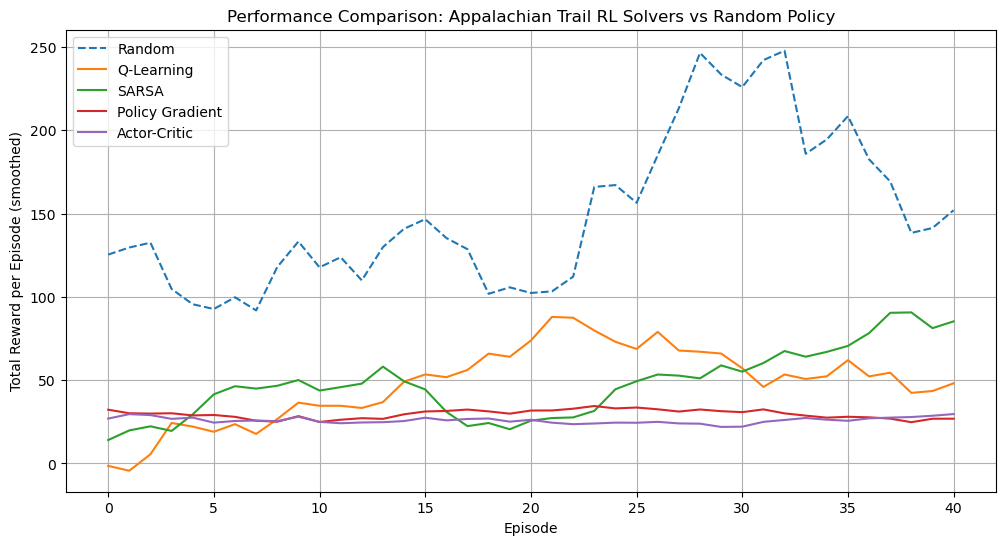

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from AppalachianRL.envs.trail_adv import AppalachianTrailAdvEnv
from AppalachianRL.solvers.q_learning import QLearningSolver
from AppalachianRL.solvers.sarsa import SarsaSolver
from AppalachianRL.solvers.policy_gradient import PolicyGradientSolver
from AppalachianRL.solvers.random import RandomAgent
from AppalachianRL.solvers.actor_critic import ActorCriticSolver


# ---------------------------
# Experiment Parameters
# ---------------------------
EPISODES = 50
SEED = 2025

# ---------------------------
# Initialize environment
# ---------------------------

env = AppalachianTrailAdvEnv(seed=SEED)

# ---------------------------
# Initialize solvers
# ---------------------------
solvers = {
    "Random": RandomAgent(env, seed=SEED),
    "Q-Learning": QLearningSolver(env, seed=SEED),
    "SARSA": SarsaSolver(env, seed=SEED),
    "Policy Gradient": PolicyGradientSolver(env, seed=SEED),
    "Actor-Critic": ActorCriticSolver(env, seed=SEED),
}

# ---------------------------
# Train each solver and collect rewards
# ---------------------------
all_rewards = {}

for name, solver in solvers.items():
    print(f"\nTraining {name}...")
    rewards, failures = solver.train(episodes=EPISODES)
    all_rewards[name] = rewards

# ---------------------------
# Plot results
# ---------------------------
plt.figure(figsize=(12, 6))
for name, rewards in all_rewards.items():
    smoothed = np.convolve(rewards, np.ones(10)/10, mode='valid')
    # dashed line for Random, solid for others
    linestyle = '--' if name=='Random' else None
    plt.plot(smoothed, label=name, linestyle=linestyle) 


plt.title("Performance Comparison: Appalachian Trail RL Solvers vs Random Policy")
plt.xlabel("Episode")
plt.ylabel("Total Reward per Episode (smoothed)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# from AppalachianRL.envs.trail2 import AppalachianTrailEnv2
# from AppalachianRL.solvers.q_learning import QLearningSolver
# from AppalachianRL.solvers.sarsa import SarsaSolver
# from AppalachianRL.solvers.policy_gradient import PolicyGradientSolver
# from AppalachianRL.solvers.random import RandomAgent
# from AppalachianRL.solvers.actor_critic import ActorCriticSolver


# # ---------------------------
# # Experiment Parameters
# # ---------------------------
# EPISODES = 500
# SEED = 2025

# # ---------------------------
# # Initialize environment
# # ---------------------------
# env = AppalachianTrailEnv2(seed=SEED)

# # ---------------------------
# # Initialize solvers
# # ---------------------------
# solvers = {
#     "Random": RandomAgent(env, seed=SEED),
#     "Q-Learning": QLearningSolver(env, seed=SEED),
#     "SARSA": SarsaSolver(env, seed=SEED),
#     "Policy Gradient": PolicyGradientSolver(env, seed=SEED),
#     "Actor-Critic": ActorCriticSolver(env, seed=SEED),
# }

# # ---------------------------
# # Train each solver and collect rewards
# # ---------------------------
# all_rewards = {}

# for name, solver in solvers.items():
#     print(f"\nTraining {name}...")
#     rewards, failures = solver.train(episodes=EPISODES)
#     all_rewards[name] = rewards

# # ---------------------------
# # Plot results
# # ---------------------------
# plt.figure(figsize=(12, 6))
# for name, rewards in all_rewards.items():
#     smoothed = np.convolve(rewards, np.ones(10)/10, mode='valid')
#     # dashed line for Random, solid for others
#     linestyle = '--' if name=='Random' else None
#     plt.plot(smoothed, label=name, linestyle=linestyle) 


# plt.title("Performance Comparison: Appalachian Trail RL Solvers vs Random Policy")
# plt.xlabel("Episode")
# plt.ylabel("Total Reward per Episode (smoothed)")
# plt.legend()
# plt.grid(True)
# plt.show()


Training Random...
Episode 50/500 | Reward: 2293.8
Episode 100/500 | Reward: 2297.0
Episode 150/500 | Reward: 2293.0
Episode 200/500 | Reward: 2293.5
Episode 250/500 | Reward: 2267.5
Episode 300/500 | Reward: 1624.0
Episode 350/500 | Reward: 1752.0
Episode 400/500 | Reward: 1736.2
Episode 450/500 | Reward: 1735.0
Episode 500/500 | Reward: 2185.8

Training Q-Learning...


UnboundLocalError: cannot access local variable 'miles' where it is not associated with a value